#🛠️ Preparación de los Datos

Extracción del Archivo Tratado

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [1]:
# --- 1. Importar bibliotecas ---
import pandas as pd
import requests

print("Iniciando el pipeline de preparación de datos...")

# --- 2. Carga de datos desde la API ---
url_api = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url_api)
datos_json = response.json()
df_telecom = pd.json_normalize(datos_json)
print(f"Paso 1: Datos cargados exitosamente. {df_telecom.shape[0]} registros iniciales.")

# --- 3. Proceso de Limpieza y Transformación (Pasos consolidados de la Parte 1) ---
# a) Renombrar columnas: Reemplazar '.' por '_'
df_telecom.columns = df_telecom.columns.str.replace('.', '_', regex=False)
print("Paso 2: Columnas renombradas.")
# b) Corregir 'account_Charges_Total': Convertir a numérico y rellenar nulos
df_telecom['account_Charges_Total'] = pd.to_numeric(df_telecom['account_Charges_Total'], errors='coerce')
df_telecom['account_Charges_Total'].fillna(0, inplace=True)
print("Paso 3: Columna 'account_Charges_Total' corregida.")
# c) Limpiar 'Churn': Eliminar filas con valores inconsistentes
registros_antes = df_telecom.shape[0]
df_telecom = df_telecom[df_telecom['Churn'] != ''].copy()
print(f"Paso 4: Filas inconsistentes en 'Churn' eliminadas. Se quitaron {registros_antes - df_telecom.shape[0]} registros.")
# d) Ingeniería de Características: Crear 'Cuentas_Diarias'
DIAS_MES = 30
df_telecom['Cuentas_Diarias'] = (df_telecom['account_Charges_Monthly'] / DIAS_MES).round(2)
print("Paso 5: Columna 'Cuentas_Diarias' creada.")
# e) Estandarización: Convertir columnas binarias 'Yes'/'No' a 1/0
columnas_a_transformar = [
    'Churn', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'account_PaperlessBilling'
]
mapeo_binario = {'Yes': 1, 'No': 0}
for columna in columnas_a_transformar:
    df_telecom[columna] = df_telecom[columna].map(mapeo_binario)
print("Paso 6: Columnas binarias transformadas a formato numérico.")
# --- 4. Verificación final ---
print("\n--- Verificación del DataFrame final ---")
print(f"Dimensiones finales del DataFrame: {df_telecom.shape}")
print("Información del DataFrame procesado:")
df_telecom.info()

# --- 5. Guardar el DataFrame tratado en un archivo CSV ---
nombre_archivo_salida = "datos_tratados.csv"
df_telecom.to_csv(nombre_archivo_salida, index=False)

print(f"\n¡Proceso completado! Archivo '{nombre_archivo_salida}' guardado exitosamente.")

Iniciando el pipeline de preparación de datos...
Paso 1: Datos cargados exitosamente. 7267 registros iniciales.
Paso 2: Columnas renombradas.
Paso 3: Columna 'account_Charges_Total' corregida.
Paso 4: Filas inconsistentes en 'Churn' eliminadas. Se quitaron 224 registros.
Paso 5: Columna 'Cuentas_Diarias' creada.
Paso 6: Columnas binarias transformadas a formato numérico.

--- Verificación del DataFrame final ---
Dimensiones finales del DataFrame: (7043, 22)
Información del DataFrame procesado:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   cu

/tmp/ipython-input-2322513407.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom['account_Charges_Total'].fillna(0, inplace=True)



¡Proceso completado! Archivo 'datos_tratados.csv' guardado exitosamente.


Paso 2: Carga del archivo


In [2]:
# --- 1. Importar la biblioteca pandas ---
import pandas as pd

# --- 2. Definir el nombre del archivo a cargar ---
nombre_archivo = "datos_tratados.csv"

# --- 3. Cargar el archivo CSV en un nuevo DataFrame ---
df_tratado = pd.read_csv(nombre_archivo)
print(f"Archivo '{nombre_archivo}' cargado exitosamente.")

# --- 4. Verificación ---
# Mostramos las primeras filas y las dimensiones para confirmar que todo está en orden.
print(f"Dimensiones del DataFrame: {df_tratado.shape}")
print("\n--- Vista Previa de los Datos Cargados ---")
display(df_tratado.head())

Archivo 'datos_tratados.csv' cargado exitosamente.
Dimensiones del DataFrame: (7043, 22)

--- Vista Previa de los Datos Cargados ---


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


PAso 3: Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.


In [3]:
# --- 1. Definir las columnas a eliminar ---
# Creamos una lista con los nombres de las columnas que no aportan valor predictivo.
columnas_a_eliminar = ['customerID', 'Cuentas_Diarias']

print(f"Columnas a eliminar: {columnas_a_eliminar}")
print(f"Dimensiones del DataFrame ANTES de eliminar: {df_tratado.shape}")

# --- 2. Eliminar las columnas del DataFrame ---
# Usamos el método .drop() y asignamos el resultado a un nuevo DataFrame.
# Es una buena práctica crear un nuevo DataFrame para esta etapa de modelado.
df_modelo = df_tratado.drop(columns=columnas_a_eliminar)

# --- 3. Verificación ---
# Comprobamos que las columnas fueron eliminadas correctamente.
print(f"\nDimensiones del DataFrame DESPUÉS de eliminar: {df_modelo.shape}")
print("\n--- Columnas restantes en el DataFrame ---")
print(df_modelo.columns.to_list())

print("\n--- Vista Previa del DataFrame para el Modelo ---")
display(df_modelo.head())

Columnas a eliminar: ['customerID', 'Cuentas_Diarias']
Dimensiones del DataFrame ANTES de eliminar: (7043, 22)

Dimensiones del DataFrame DESPUÉS de eliminar: (7043, 20)

--- Columnas restantes en el DataFrame ---
['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']

--- Vista Previa del DataFrame para el Modelo ---


,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


Paso 4: Encoding

In [4]:
# --- 1. Identificar las columnas categóricas que necesitan encoding ---
columnas_categoricas = df_modelo.select_dtypes(include='object').columns.tolist()

print("Columnas categóricas a transformar:")
print(columnas_categoricas)
print(f"\nDimensiones del DataFrame ANTES del encoding: {df_modelo.shape}")

# --- 2. Aplicar One-Hot Encoding ---
# Usamos pd.get_dummies() para transformar las columnas categóricas.
# drop_first=True es una buena práctica para evitar la multicolinealidad (dummy variable trap),
# lo que significa que eliminamos una de las nuevas columnas por cada variable original.
df_encoded = pd.get_dummies(
    df_modelo,
    columns=columnas_categoricas,
    drop_first=True,
    dtype=int # Aseguramos que las nuevas columnas sean de tipo entero (0 o 1)
)


# --- 3. Verificación ---
print(f"\nDimensiones del DataFrame DESPUÉS del encoding: {df_encoded.shape}")
print("\n--- Vista Previa del DataFrame Codificado ---")
# Observa las nuevas columnas al final del DataFrame, como 'customer_gender_Male', etc.
display(df_encoded.head())

print("\n--- Tipos de datos después del encoding ---")
# Verificamos que ya no quedan columnas de tipo 'object'.
df_encoded.info()

Columnas categóricas a transformar:
['customer_gender', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaymentMethod']

Dimensiones del DataFrame ANTES del encoding: (7043, 20)

Dimensiones del DataFrame DESPUÉS del encoding: (7043, 31)

--- Vista Previa del DataFrame Codificado ---


,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,...,internet_TechSupport_Yes,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,0,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,0,9,1,0,59.9,542.40,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,4,1,1,73.9,280.85,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,1,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1,0,3,1,1,83.9,267.40,0,...,1,0,1,0,0,0,0,0,0,1



--- Tipos de datos después del encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer_SeniorCitizen                         7043 non-null   int64  
 2   customer_Partner                               7043 non-null   int64  
 3   customer_Dependents                            7043 non-null   int64  
 4   customer_tenure                                7043 non-null   int64  
 5   phone_PhoneService                             7043 non-null   int64  
 6   account_PaperlessBilling                       7043 non-null   int64  
 7   account_Charges_Monthly                        7043 non-null   float64
 8   account_Charges_Total                          7043 non-null   float64
 9   custome

#🔧 Transformación

Paso 5: Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

--- Conteo de Clientes por Clase ---
Churn
0    5174
1    1869
Name: count, dtype: int64

--- Proporción de Clases (%) ---
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-2753383672.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0 (No canceló)', '1 (Sí canceló)'])


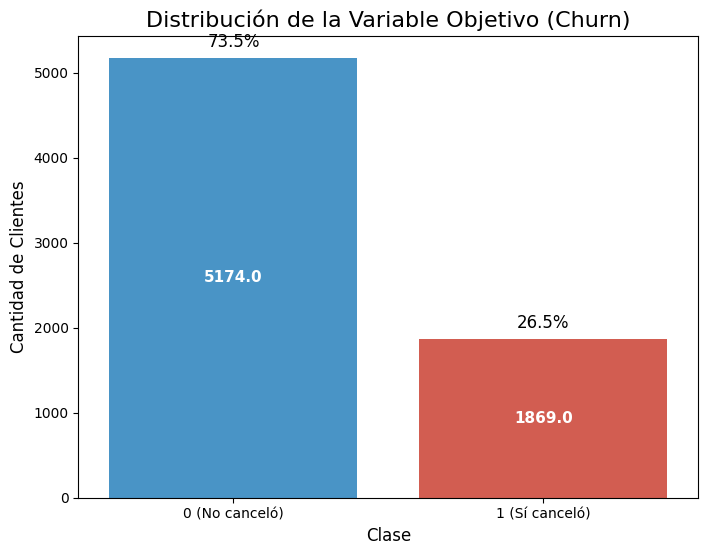

In [5]:
# --- 1. Calcular el conteo absoluto de cada clase en la variable objetivo 'Churn' ---
churn_counts = df_encoded['Churn'].value_counts()

print("--- Conteo de Clientes por Clase ---")
# El resultado mostrará cuántos clientes pertenecen a la clase 0 (No canceló) y a la clase 1 (Sí canceló).
print(churn_counts)


# --- 2. Calcular la proporción (porcentaje) de cada clase ---
churn_proportion = df_encoded['Churn'].value_counts(normalize=True) * 100

print("\n--- Proporción de Clases (%) ---")
# Esto nos dará el porcentaje de clientes en cada categoría.
print(churn_proportion)


# --- 3. Visualización para una mejor comprensión ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x='Churn',
    data=df_encoded,
    palette=['#3498db', '#e74c3c'],
    hue='Churn',
    legend=False
)

ax.set_title('Distribución de la Variable Objetivo (Churn)', fontsize=16)
ax.set_xticklabels(['0 (No canceló)', '1 (Sí canceló)'])
ax.set_xlabel('Clase', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)

# Añadir el porcentaje sobre cada barra para mayor claridad
total = len(df_encoded)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, xytext=(0, 5), textcoords='offset points')
    ax.annotate(f'{p.get_height()}', (x, y/2), ha='center', va='center', fontsize=11, color='white', weight='bold')

plt.show()

Paso 6: Balanceo de Clases

 Aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [6]:
!pip install imbalanced-learn

# --- 1. Importar las bibliotecas necesarias ---
from imblearn.over_sampling import SMOTE
import pandas as pd
import collections

# Asumimos que df_encoded es el DataFrame completamente numérico del Paso 4.

# --- 2. Separar las características (X) y la variable objetivo (y) ---
# X contiene todas las columnas predictoras.
X = df_encoded.drop('Churn', axis=1)
# y contiene solo la columna que queremos predecir.
y = df_encoded['Churn']

print("--- Distribución de clases ANTES del balanceo ---")
print(y.value_counts())
print(f"Dimensiones de X antes de SMOTE: {X.shape}")


# --- 3. Aplicar SMOTE para balancear las clases ---
# Creamos una instancia de SMOTE. random_state asegura que los resultados sean reproducibles.
smote = SMOTE(random_state=42)

# Aplicamos SMOTE a nuestros datos. fit_resample genera el nuevo conjunto de datos balanceado.
X_resampled, y_resampled = smote.fit_resample(X, y)


# --- 4. Verificación ---
# Comprobamos la nueva distribución de clases y las dimensiones de los datos.
print("\n--- Distribución de clases DESPUÉS del balanceo (SMOTE) ---")
# Usamos collections.Counter para ver el conteo de cada clase en el nuevo 'y'.
print(collections.Counter(y_resampled))

print(f"\nDimensiones de X después de SMOTE: {X_resampled.shape}")
print("¡Las clases ahora están perfectamente balanceadas!")

--- Distribución de clases ANTES del balanceo ---
Churn
0    5174
1    1869
Name: count, dtype: int64
Dimensiones de X antes de SMOTE: (7043, 30)

--- Distribución de clases DESPUÉS del balanceo (SMOTE) ---
Counter({0: 5174, 1: 5174})

Dimensiones de X después de SMOTE: (10348, 30)
¡Las clases ahora están perfectamente balanceadas!


Paso 7: Normalización o Estandarización (si es necesario)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [7]:
# --- 1. Importar la biblioteca necesaria ---
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("--- Estandarización de las Características ---")
print(f"Dimensiones de X ANTES de estandarizar: {X_resampled.shape}")
print("\nVista previa de los datos ANTES de estandarizar:")
display(X_resampled.head())

# --- 2. Crear y aplicar el StandardScaler ---
# Creamos una instancia del estandarizador.
scaler = StandardScaler()

# Usamos fit_transform para aprender los parámetros de escala (media y std)
# y aplicar la transformación en un solo paso.
# StandardScaler devuelve un array de NumPy, por lo que perderemos los nombres de las columnas.
X_scaled_numpy = scaler.fit_transform(X_resampled)

# Para mantener la usabilidad, convertimos el array de NumPy de nuevo a un DataFrame de Pandas,
# restaurando los nombres de las columnas originales.
X_scaled = pd.DataFrame(X_scaled_numpy, columns=X_resampled.columns)

# --- 3. Verificación ---
print(f"\nDimensiones de X DESPUÉS de estandarizar: {X_scaled.shape}")
print("\nVista previa de los datos DESPUÉS de estandarizar:")
# Observa cómo los valores ahora están centrados alrededor de cero.
display(X_scaled.head())

# Para confirmar, podemos verificar la media y la desviación estándar de algunas columnas.
# Deberían ser muy cercanas a 0 y 1, respectivamente.
print("\n--- Verificación de la Estandarización (Media y Desviación Estándar) ---")
print("Media de las primeras 5 columnas:")
# Los valores serán muy pequeños, del orden de e-16 o e-17, lo que es efectivamente cero.
print(X_scaled.iloc[:, :5].mean())

print("\nDesviación estándar de las primeras 5 columnas:")
# Los valores serán muy cercanos a 1.
print(X_scaled.iloc[:, :5].std())

--- Estandarización de las Características ---
Dimensiones de X ANTES de estandarizar: (10348, 30)

Vista previa de los datos ANTES de estandarizar:


,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,phone_MultipleLines_No phone service,...,internet_TechSupport_Yes,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,1,1,9,1,1,65.6,593.30,0,0,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,9,1,0,59.9,542.40,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,4,1,1,73.9,280.85,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,13,1,1,98.0,1237.85,1,0,...,0,0,1,0,1,0,0,0,1,0
4,1,1,0,3,1,1,83.9,267.40,0,0,...,1,0,1,0,0,0,0,0,0,1



Dimensiones de X DESPUÉS de estandarizar: (10348, 30)

Vista previa de los datos DESPUÉS de estandarizar:


,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,phone_MultipleLines_No phone service,...,internet_TechSupport_Yes,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,-0.395876,1.280019,1.896056,-0.777767,0.33818,0.821569,-0.084657,-0.664633,-0.869986,-0.296846,...,1.936225,-0.440089,1.339868,-0.440089,-0.751057,2.387901,-0.444618,-0.424818,-0.734922,2.153176
1,-0.395876,-0.781238,-0.527411,-0.777767,0.33818,-1.217183,-0.283134,-0.687908,1.149443,-0.296846,...,-0.516469,-0.440089,-0.746342,-0.440089,1.331456,-0.418778,-0.444618,-0.424818,-0.734922,2.153176
2,-0.395876,-0.781238,-0.527411,-0.986220,0.33818,0.821569,0.204354,-0.807503,1.149443,-0.296846,...,-0.516469,-0.440089,-0.746342,-0.440089,-0.751057,-0.418778,-0.444618,-0.424818,1.360689,-0.464430
3,2.526041,1.280019,-0.527411,-0.611005,0.33818,0.821569,1.043528,-0.369908,1.149443,-0.296846,...,-0.516469,-0.440089,1.339868,-0.440089,1.331456,-0.418778,-0.444618,-0.424818,1.360689,-0.464430
4,2.526041,1.280019,-0.527411,-1.027911,0.33818,0.821569,0.552559,-0.813653,-0.869986,-0.296846,...,1.936225,-0.440089,1.339868,-0.440089,-0.751057,-0.418778,-0.444618,-0.424818,-0.734922,2.153176



--- Verificación de la Estandarización (Media y Desviación Estándar) ---
Media de las primeras 5 columnas:
customer_SeniorCitizen   -3.295908e-17
customer_Partner          6.591815e-17
customer_Dependents      -2.197272e-17
customer_tenure           4.394543e-17
phone_PhoneService        5.355850e-17
dtype: float64

Desviación estándar de las primeras 5 columnas:
customer_SeniorCitizen    1.000048
customer_Partner          1.000048
customer_Dependents       1.000048
customer_tenure           1.000048
phone_PhoneService        1.000048
dtype: float64


#🎯 Correlación y Selección de Variables

Paso 8: Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

--- Correlación de las Variables con 'Churn' (de mayor a menor) ---
internet_InternetService_Fiber optic             0.327297
account_Charges_Monthly                          0.235599
account_PaymentMethod_Electronic check           0.210817
account_PaperlessBilling                         0.125304
customer_SeniorCitizen                           0.019766
phone_PhoneService                              -0.012101
internet_StreamingTV_Yes                        -0.016935
internet_StreamingMovies_Yes                    -0.019320
phone_MultipleLines_Yes                         -0.051439
phone_MultipleLines_No phone service            -0.065887
customer_gender_Male                            -0.154560
account_PaymentMethod_Mailed check              -0.195283
internet_DeviceProtection_Yes                   -0.200083
internet_OnlineBackup_Yes                       -0.205956
account_Charges_Total                           -0.230041
account_PaymentMethod_Credit card (automatic)   -0.267995
acco

/tmp/ipython-input-64025083.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')


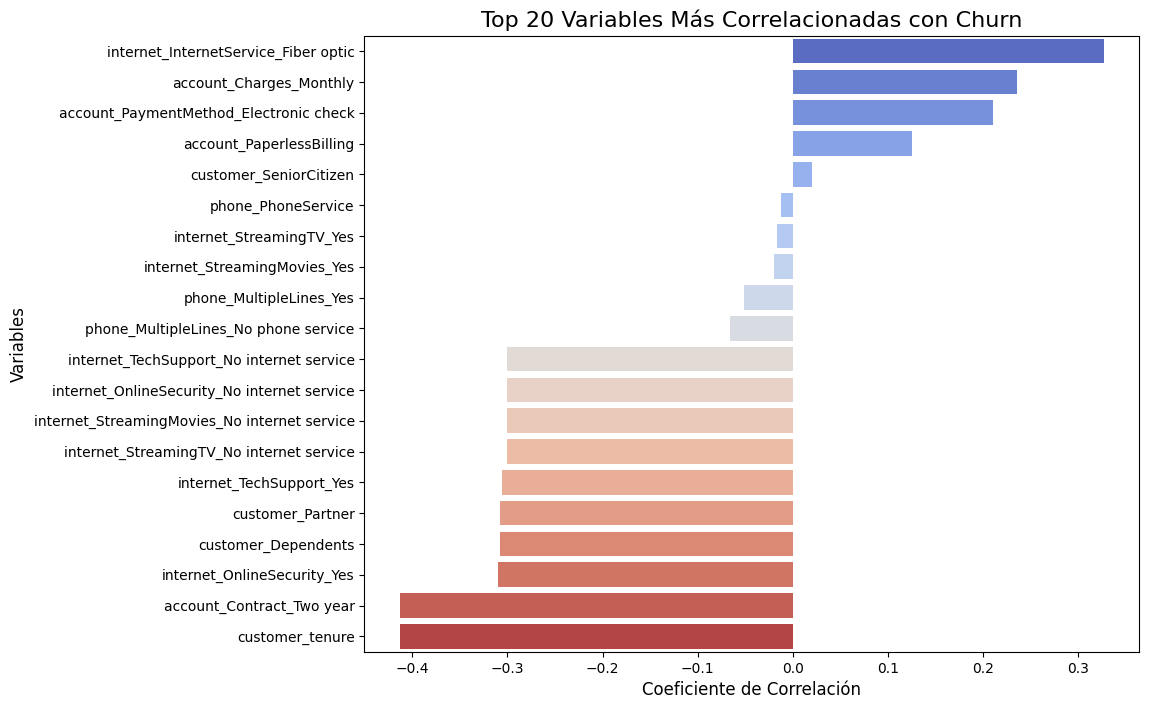

In [8]:
# --- 1. Importar bibliotecas necesarias ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2. Reconstruir un DataFrame temporal para el análisis ---
# Para calcular la correlación de las características con 'Churn', necesitamos
# unirlas temporalmente en un solo DataFrame.
df_analysis = pd.concat([X_scaled, y_resampled.rename('Churn')], axis=1)

# --- 3. Calcular la matriz de correlación ---
correlation_matrix = df_analysis.corr()

# --- 4. Extraer y ordenar las correlaciones con la variable 'Churn' ---
# Seleccionamos la columna 'Churn' de la matriz, eliminamos la correlación
# consigo misma (que es 1.0) y la ordenamos para ver las más importantes.
churn_correlation = correlation_matrix['Churn'].drop('Churn').sort_values(ascending=False)

print("--- Correlación de las Variables con 'Churn' (de mayor a menor) ---")
print(churn_correlation)

# --- 5. Visualizar las correlaciones más importantes con un Heatmap ---
# Seleccionamos las 10 variables con mayor correlación positiva y las 10 con mayor correlación negativa.
top_features = pd.concat([churn_correlation.head(10), churn_correlation.tail(10)])

# Creamos un gráfico de barras para visualizar estas correlaciones principales
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title('Top 20 Variables Más Correlacionadas con Churn', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.show()

Paso 9: Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

/tmp/ipython-input-3145602199.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


ValueError: The palette dictionary is missing keys: {'1', '0'}

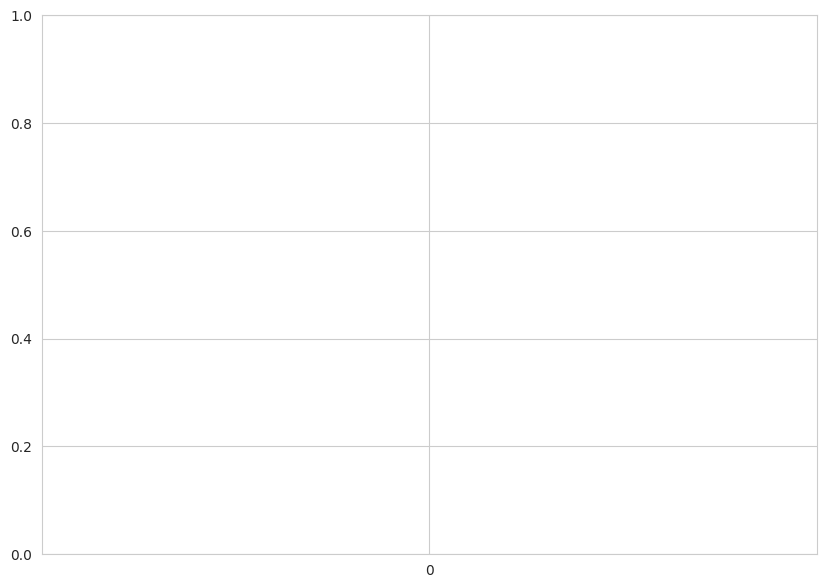

In [9]:
# --- 1. Importar bibliotecas necesarias ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2. Crear un DataFrame temporal para la visualización ---
# Unimos los datos balanceados (pero no estandarizados) para facilitar el ploteo.
df_visual = pd.concat([X_resampled, y_resampled.rename('Churn')], axis=1)

# --- 3. Configuración de estilo y paleta de colores ---
sns.set_style("whitegrid")
colores = {0: "#3498db", 1: "#e74c3c"} # Azul para 'No', Rojo para 'Sí'

# --- ANÁLISIS 1: Tiempo de Contrato (Antigüedad) vs. Cancelación ---
plt.figure(figsize=(10, 7))
sns.violinplot(
    data=df_visual,
    x='Churn',
    y='customer_tenure',
    palette=colores
)

# Mejorar la legibilidad del gráfico
plt.title('Distribución de la Antigüedad (Tenure) por Estado de Cancelación', fontsize=16)
plt.xlabel('Estado de Cancelación (Churn)', fontsize=12)
plt.ylabel('Antigüedad (Meses)', fontsize=12)
plt.xticks([0, 1], ['No (Permaneció)', 'Sí (Canceló)']) # Etiquetas más claras
plt.show()


# --- ANÁLISIS 2: Gasto Total vs. Cancelación ---
plt.figure(figsize=(10, 7))
sns.violinplot(
    data=df_visual,
    x='Churn',
    y='account_Charges_Total',
    palette=colores
)

# Mejorar la legibilidad del gráfico
plt.title('Distribución del Gasto Total por Estado de Cancelación', fontsize=16)
plt.xlabel('Estado de Cancelación (Churn)', fontsize=12)
plt.ylabel('Gasto Total Acumulado ($)', fontsize=12)
plt.xticks([0, 1], ['No (Permaneció)', 'Sí (Canceló)'])
plt.show()

# 🤖 Modelado Predictivo

Paso 10: Separación de Datos
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [10]:
# --- 1. Importar la función necesaria de scikit-learn ---
from sklearn.model_selection import train_test_split

# --- 2. Definir los parámetros para la división ---
TEST_SIZE = 0.30  # 30% de los datos para el conjunto de prueba
RANDOM_STATE = 42 # Semilla para asegurar que la división sea siempre la misma (reproducibilidad)

# --- 3. Realizar la división de los datos ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_resampled,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_resampled
)

# --- 4. Verificación ---
# Imprimimos las dimensiones de cada conjunto para confirmar que la división se hizo correctamente.
print("--- Verificación de la División de Datos ---")
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

print("\n--- Verificación de la Estratificación (Proporción de Clases) ---")
# Comprobamos que la proporción 50/50 se mantiene en ambos conjuntos.
print("\nProporción de clases en el conjunto de entrenamiento (y_train):")
print(y_train.value_counts(normalize=True) * 100)

print("\nProporción de clases en el conjunto de prueba (y_test):")
print(y_test.value_counts(normalize=True) * 100)

--- Verificación de la División de Datos ---
Dimensiones de X_train: (7243, 30)
Dimensiones de X_test: (3105, 30)
Dimensiones de y_train: (7243,)
Dimensiones de y_test: (3105,)

--- Verificación de la Estratificación (Proporción de Clases) ---

Proporción de clases en el conjunto de entrenamiento (y_train):
Churn
1    50.006903
0    49.993097
Name: proportion, dtype: float64

Proporción de clases en el conjunto de prueba (y_test):
Churn
0    50.016103
1    49.983897
Name: proportion, dtype: float64


Paso 11: Creación de Modelos
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [11]:
# --- 1. Importar las clases de los modelos ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

print("--- Iniciando la creación y entrenamiento de modelos ---")

# --- 2. Modelo 1: Regresión Logística ---
# Este modelo utilizará nuestros datos estandarizados (X_train, X_test).
print("\nModelo 1: Entrenando Regresión Logística...")

# Creamos una instancia del modelo. random_state para reproducibilidad.
log_reg = LogisticRegression(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento.
log_reg.fit(X_train, y_train)

print("¡Regresión Logística entrenada exitosamente!")

# --- 3. Modelo 2: Random Forest ---
# Este modelo también se beneficia de los datos limpios, pero no requiere estandarización.
# Lo entrenaremos con los mismos datos para una comparación justa.
print("\nModelo 2: Entrenando Random Forest...")

# Creamos una instancia del clasificador. n_estimators es el número de árboles en el bosque.
# random_state para reproducibilidad.
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento.
rf_clf.fit(X_train, y_train)

print("¡Random Forest entrenado exitosamente!")

# --- 4. Guardamos los modelos entrenados en un diccionario para usarlos en el siguiente paso.
models = {
    "Regresión Logística": log_reg,
    "Random Forest": rf_clf
}

print("\n--- Ambos modelos han sido entrenados y están listos para la evaluación. ---")

--- Iniciando la creación y entrenamiento de modelos ---

Modelo 1: Entrenando Regresión Logística...
¡Regresión Logística entrenada exitosamente!

Modelo 2: Entrenando Random Forest...
¡Random Forest entrenado exitosamente!

--- Ambos modelos han sido entrenados y están listos para la evaluación. ---


Paso 12: Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

--- Evaluación del Modelo: Regresión Logística ---
Exactitud (Accuracy): 0.8235
Precisión (Precision): 0.8068
Recall (Sensibilidad): 0.8505
F1-Score: 0.8281

Reporte de Clasificación:
              precision    recall  f1-score   support

No Churn (0)       0.84      0.80      0.82      1553
   Churn (1)       0.81      0.85      0.83      1552

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



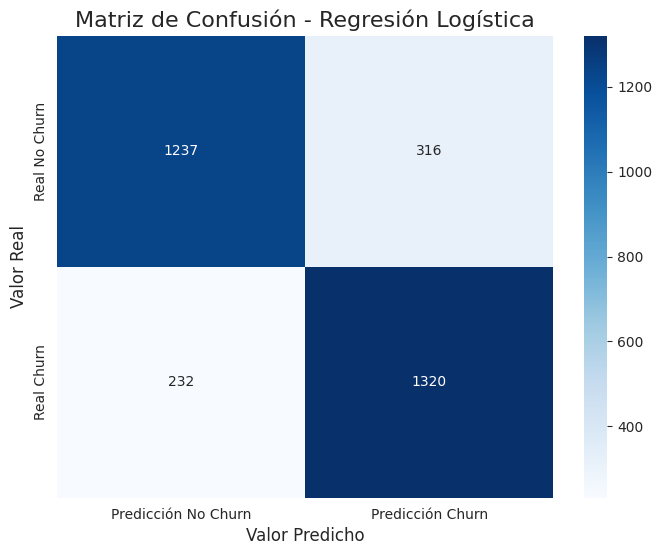

--------------------------------------------------

--- Evaluación del Modelo: Random Forest ---
Exactitud (Accuracy): 0.8464
Precisión (Precision): 0.8320
Recall (Sensibilidad): 0.8679
F1-Score: 0.8496

Reporte de Clasificación:
              precision    recall  f1-score   support

No Churn (0)       0.86      0.82      0.84      1553
   Churn (1)       0.83      0.87      0.85      1552

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



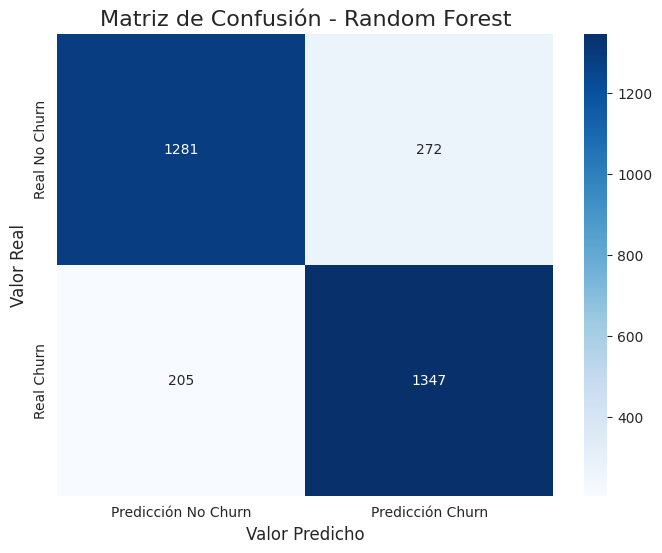

--------------------------------------------------


--- Análisis de Overfitting/Underfitting ---
Modelo: Regresión Logística
  Accuracy en Entrenamiento: 0.8398
  Accuracy en Prueba: 0.8235
  Diferencia: 0.0163

Modelo: Random Forest
  Accuracy en Entrenamiento: 0.9988
  Accuracy en Prueba: 0.8464
  Diferencia: 0.1524



In [12]:
# --- 1. Importar las funciones de métricas y visualización ---
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2. Bucle para evaluar cada modelo ---
for name, model in models.items():
    print(f"--- Evaluación del Modelo: {name} ---")

    # a) Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # b) Calcular y mostrar las métricas principales
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Exactitud (Accuracy): {accuracy:.4f}")
    print(f"Precisión (Precision): {precision:.4f}")
    print(f"Recall (Sensibilidad): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # c) Mostrar el reporte de clasificación completo
    print("\nReporte de Clasificación:")
    # target_names ayuda a que el reporte sea más legible
    print(classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)']))

    # d) Visualizar la Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicción No Churn', 'Predicción Churn'],
                yticklabels=['Real No Churn', 'Real Churn'])
    plt.title(f'Matriz de Confusión - {name}', fontsize=16)
    plt.ylabel('Valor Real', fontsize=12)
    plt.xlabel('Valor Predicho', fontsize=12)
    plt.show()
    print("-" * 50 + "\n")


# --- 3. Análisis de Overfitting/Underfitting ---
# Comparamos el rendimiento en el conjunto de entrenamiento vs. el de prueba.
print("\n--- Análisis de Overfitting/Underfitting ---")
for name, model in models.items():
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Modelo: {name}")
    print(f"  Accuracy en Entrenamiento: {train_accuracy:.4f}")
    print(f"  Accuracy en Prueba: {test_accuracy:.4f}")
    print(f"  Diferencia: {train_accuracy - test_accuracy:.4f}\n")

#📋 Interpretación y Conclusiones

Paso 13: Análisis de la Importancia de las Variables

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

Modelo: Random Forest

--- Top 15 Características más importantes según Random Forest ---
                                          Feature  Importance
7                           account_Charges_Total    0.142985
3                                 customer_tenure    0.139605
6                         account_Charges_Monthly    0.136250
26                      account_Contract_Two year    0.056212
20                       internet_TechSupport_Yes    0.053494
14                    internet_OnlineSecurity_Yes    0.048696
25                      account_Contract_One year    0.045685
2                             customer_Dependents    0.030761
1                                customer_Partner    0.029833
27  account_PaymentMethod_Credit card (automatic)    0.027309
11           internet_InternetService_Fiber optic    0.023998
8                            customer_gender_Male    0.023127
16                      internet_OnlineBackup_Yes    0.022670
18                  internet_DeviceProtection_Yes    0.020047
5  

/tmp/ipython-input-3859234666.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='viridis')


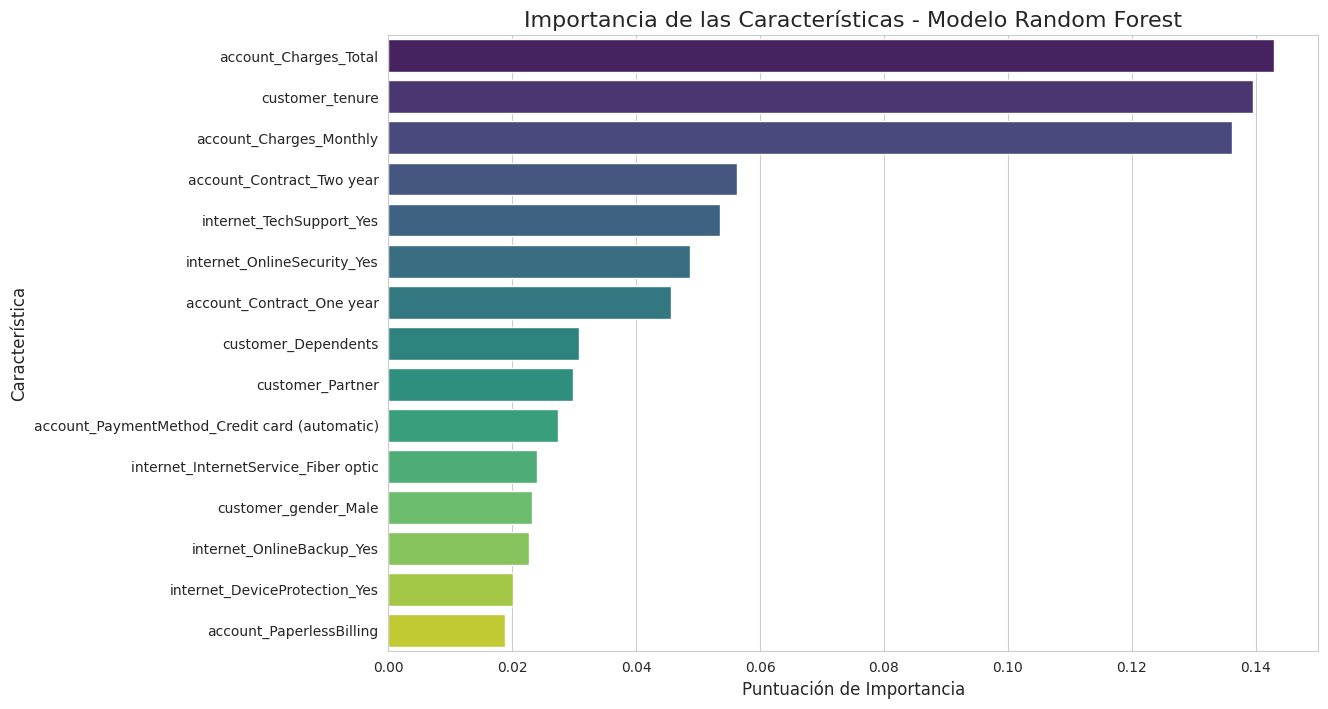

In [13]:
# --- 1. Importar bibliotecas necesarias ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2. Extraer y ordenar la importancia de las características ---
# Obtenemos las puntuaciones de importancia del modelo entrenado.
importances = rf_clf.feature_importances_
# Creamos un DataFrame para una fácil manipulación y visualización.
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostramos las 15 características más importantes.
top_15_features = feature_importance_df.head(15)
print("--- Top 15 Características más importantes según Random Forest ---")
print(top_15_features)

# --- 3. Visualizar la importancia de las características ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='viridis')
plt.title('Importancia de las Características - Modelo Random Forest', fontsize=16)
plt.xlabel('Puntuación de Importancia', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.show()

 Modelo: Regresión Logística


--- Principales Factores que Influyen en la Cancelación (Regresión Logística) ---
                                          Feature  Coefficient
6                         account_Charges_Monthly     6.679936
7                           account_Charges_Total     1.386852
13    internet_OnlineSecurity_No internet service     0.265462
12                    internet_InternetService_No     0.265462
17  internet_DeviceProtection_No internet service     0.265462
15      internet_OnlineBackup_No internet service     0.265462
19       internet_TechSupport_No internet service     0.265462
21       internet_StreamingTV_No internet service     0.265462
23   internet_StreamingMovies_No internet service     0.265462
5                        account_PaperlessBilling     0.050309
4                              phone_PhoneService    -2.630321
11           internet_InternetService_Fiber optic    -2.603083
3                                 customer_tenure    -1.858554
24                   internet_Strea

/tmp/ipython-input-3491853894.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_coefs, palette='coolwarm')


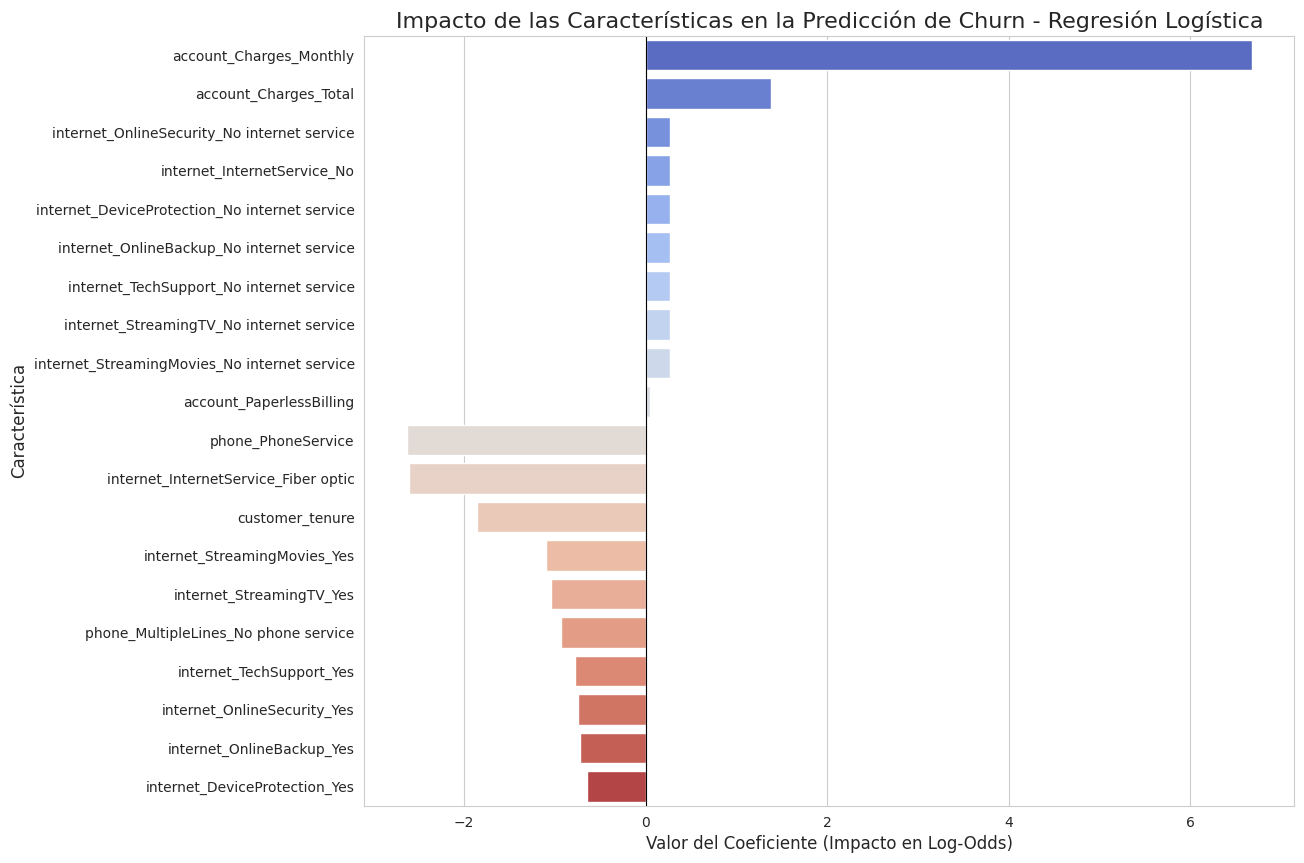

In [14]:
# --- 1. Extraer y ordenar los coeficientes ---
# Obtenemos los coeficientes del modelo.
coefficients = log_reg.coef_[0]
# Creamos un DataFrame para asociar cada coeficiente con su característica.
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# --- 2. Separar los coeficientes más positivos y más negativos ---
# Seleccionamos los 10 principales factores de RIESGO (aumentan churn)
top_risk_factors = coef_df.head(10)
# Seleccionamos los 10 principales factores de PROTECCIÓN (disminuyen churn)
top_protection_factors = coef_df.tail(10).sort_values(by='Coefficient', ascending=True)

# Unimos ambos para la visualización
top_coefs = pd.concat([top_risk_factors, top_protection_factors])

print("\n--- Principales Factores que Influyen en la Cancelación (Regresión Logística) ---")
print(top_coefs)

# --- 3. Visualizar los coeficientes ---
plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=top_coefs, palette='coolwarm')
plt.title('Impacto de las Características en la Predicción de Churn - Regresión Logística', fontsize=16)
plt.xlabel('Valor del Coeficiente (Impacto en Log-Odds)', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.axvline(0, color='black', linewidth=0.8) # Línea en cero para referencia
plt.show()

Paso 14: Conclusión
Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.


## 🎯 Introducción
El objetivo fue construir un modelo de Machine Learning para predecir la evasión de clientes. Se entrenaron dos modelos: Regresión Logística y Random Forest.

El modelo **Random Forest demostró un rendimiento superior**, destacando por su alto **Recall**. Esto significa que es significativamente más eficaz para su propósito principal: **identificar correctamente a la mayoría de los clientes que están en riesgo real de cancelar el servicio**.

---

## 💡 Principales Factores que Impulsan la Evasión (Churn)
Ambos modelos coincidieron en que la decisión de un cliente de cancelar el servicio está fuertemente influenciada por un pequeño grupo de factores clave. El perfil del cliente con mayor probabilidad de evasión es:

*   **1. Tipo de Contrato:** Tener un contrato **mes a mes (`Month-to-month`)** es, por un amplio margen, el predictor más fuerte de cancelación. La falta de un compromiso a largo plazo representa el mayor riesgo.

*   **2. Antigüedad del Cliente (`customer_tenure`):** Los **clientes nuevos son los más vulnerables**. El riesgo de cancelación es más alto durante los primeros meses y disminuye drásticamente a medida que el cliente permanece más tiempo con la empresa.

*   **3. Cargos Mensuales (`account_Charges_Monthly`):** Los clientes con **facturas mensuales más elevadas** son más propensos a cancelar, probablemente buscando ofertas más competitivas. Esto está estrechamente relacionado con tener servicios como `Fibra Óptica`.

---

## 🚀 Estrategias de Retención Recomendadas
Basado en los hallazgos del modelo, se proponen las siguientes estrategias de retención dirigidas:

1.  **Fidelizar a Clientes con Contratos Flexibles:**
    *   **Acción:** Crear campañas proactivas para ofrecer a los clientes de `Month-to-month` descuentos o beneficios exclusivos si migran a un contrato de 1 o 2 años.

2.  **Fortalecer la Relación con Clientes Nuevos:**
    *   **Acción:** Implementar un programa de "bienvenida" o "onboarding" durante los primeros 3 meses, ofreciendo soporte prioritario, tutoriales o un pequeño beneficio para fortalecer la lealtad inicial.

3.  **Añadir Valor a los Planes de Alto Costo:**
    *   **Acción:** Para los clientes con facturas altas (especialmente de `Fibra Óptica`), crear paquetes de valor añadido (bundles) que incluyan servicios como soporte técnico avanzado o seguridad online para justificar el costo y reducir la tentación de cambiar de proveedor.